# Part 3: Predicting the Survival of Titanic Passengers

For this exercise we consider the [Kaggle](https://www.kaggle.com) competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

The description of the problem is (from the Kaggle page):

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>
> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

The description of the data is available on the [Kaggle page](https://www.kaggle.com/c/titanic/data), while the actual data is available in the directory `data/titanic/`.

Below the description taken from the website:

> ### Overview
> 
> The data has been split into two groups:
> 
> -   training set (train.csv)
> -   test set (test.csv)
> 
> The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the "ground truth") for each passenger. Your model will be based on "features" like passengers' gender and class. You can also use [feature engineering ](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) to create new features.
> 
> The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
> 
> We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
> 
> ### Data Dictionary
> 
> | Variable | Definition | Key |
> |----------|------------|-----|
> | survival | Survival | 0 = No, 1 = Yes |
> | pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
> | sex | Sex |  |
> | Age | Age in years |  |
> | sibsp | # of siblings / spouses aboard the Titanic |  |
> | parch | # of parents / children aboard the Titanic |  |
> | ticket | Ticket number |  |
> | fare | Passenger fare |  |
> | cabin | Cabin number |  |
> | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
> 
> ### Variable Notes
> 
> **pclass**: A proxy for socio-economic status (SES)  
> 1st = Upper  
> 2nd = Middle   
> 3rd = Lower
> 
> **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
> 
> **sibsp**: The dataset defines family relations in this way...  
> Sibling = brother, sister, stepbrother, stepsister  
> Spouse = husband, wife (mistresses and fiancés were ignored)
> 
> **parch**: The dataset defines family relations in this way...  
> Parent = mother, father  
> Child = daughter, son, stepdaughter, stepson  
> Some children travelled only with a nanny, therefore parch=0 for them.



## Generating your solution

You should adopt the same submission rules as the [Kaggle competition](https://www.kaggle.com/c/titanic#evaluation):

> **Goal**
> 
> It is your job to predict if a passenger survived the sinking of the Titanic or not. 
> For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
> 
> **Metric**
>
> Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.
> 
> **Submission File Format**
> 
> You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
> 
> The file should have exactly 2 columns:
> 
> ```
> PassengerId (sorted in any order)
> Survived (contains your binary predictions: 1 for survived, 0 for deceased)
> PassengerId,Survived
>  892,0
>  893,1
>  894,0
>  Etc.
> ```
> 
> You can download an example submission file (gender_submission.csv) on the Data page.



Your task is to use the techniques learned in the previous exercises to build a classifier, using the *training set*, that provides the survival prediction for the *test set*.

Create a file `titanic-submission.csv` in the current directory with the prediction. You can also provide different predictions (use `_n.csv`) to distinguish them, but you need to describe how they have been generated. To export to CSV you can use the pandas [pandas.DataFrame.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method.

It is paramount to explain the reason for your choices, the rationale behind your approach and decisions is more important than the final result. The explanation must be included in this notebook.

You can also register in [Kaggle](https://www.kaggle.com) and submit your solution to get the accuracy of your solution.

## General notes

- ML algorithms work better with numerical values, you should cast categorical features into integers.
- For classification, continuous numerical values may lead to overfitting, it's a common practice to aggregate the values. Pandas provides an handy [quantile-based discretization function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html).
- Too many features may lead to overfitting, better drop the least significant ones.
- Data visualisation may help in identifying relevant features.
- You may want to create new features based on existing ones.


# Add your code below

***


In [773]:
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [774]:
titanic_train = pd.read_csv('./data/titanic/train.csv')

### Preprocessing the data

In [775]:
#Getting a description of the dataset
print(titanic_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [776]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see from the info about the dataset some preprocessing steps are required to improve the performance of the classifier. Namely, by looking at the structure of the dataset we note that the type of the sex attribute is a string which can for example be represented by a categorical number. Also the age feature contains some nan values which can be replaced by its mean. Moreover, we can exclude some features that are insignificant and may bias the classification task such as the passengerId, name, ticket and cabin (this last feature is a string and most of the values are unknown). We will then analyse the correlation between features in order to have a better idea of their relationship.

In [777]:
#Additionally we can drop irrelevant features such as the passengerId and name
columns_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train.drop(columns_drop,axis=1, inplace=True) 
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [778]:
#In order to encode the age attribute with value betweeen 0 and 1 we can use the labelEncode provided by the sklearn library
le=LabelEncoder()
titanic_train['Sex']=le.fit_transform(titanic_train['Sex'])
#We show the classes 0 for female, 1 for male as expected
print("Classes: ",le.classes_) 
print(titanic_train['Sex'].head())

Classes:  ['female' 'male']
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32


In [779]:
#Since the embarked feature has categorical value we do the same and inspect the correlation between features
#We expect that this feature does not play a significant role for the classification
titanic_train['Embarked'].fillna('Unknown',inplace=True)

# We use the pandas get_dummies function for one-hot encoding,
# since there is no order relationship between values
catDf = pd.get_dummies(data=titanic_train['Embarked'])
titanic_train = pd.concat([catDf, titanic_train], axis=1)
del titanic_train['Embarked'] 
 

In [780]:
# We replace the Nan age entries with the mean of the age feature.
#An alternative would be to discard such entries but since the dataset does not contain plenty of information we decide to keep them
titanic_train['Age']=titanic_train['Age'].fillna(value=titanic_train['Age'].mean())
titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C         891 non-null    uint8  
 1   Q         891 non-null    uint8  
 2   S         891 non-null    uint8  
 3   Unknown   891 non-null    uint8  
 4   Survived  891 non-null    int64  
 5   Pclass    891 non-null    int64  
 6   Sex       891 non-null    int32  
 7   Age       891 non-null    int32  
 8   SibSp     891 non-null    int64  
 9   Parch     891 non-null    int64  
 10  Fare      891 non-null    float64
dtypes: float64(1), int32(2), int64(4), uint8(4)
memory usage: 45.4 KB


#### Data visualization 

In this section we visualize the dataset by means of plots in order to understand which features play a major rule in the discrimination of survival

<AxesSubplot:xlabel='Pclass', ylabel='count'>

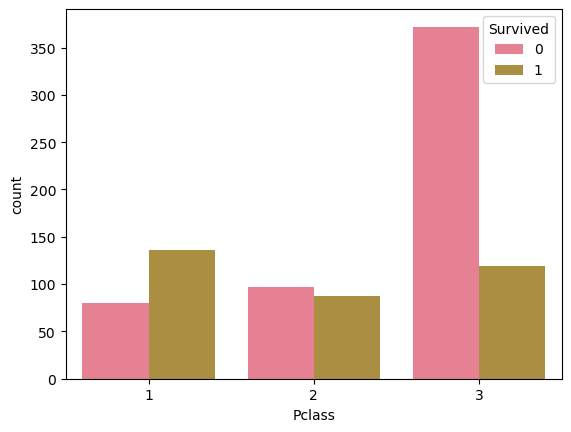

In [781]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_train)

As we can see there is a correlation between the class of the ticket and the survival. Passengers in higher class are more likely to survive. This feature seems to be significant for the classification task.

<AxesSubplot:xlabel='Sex', ylabel='count'>

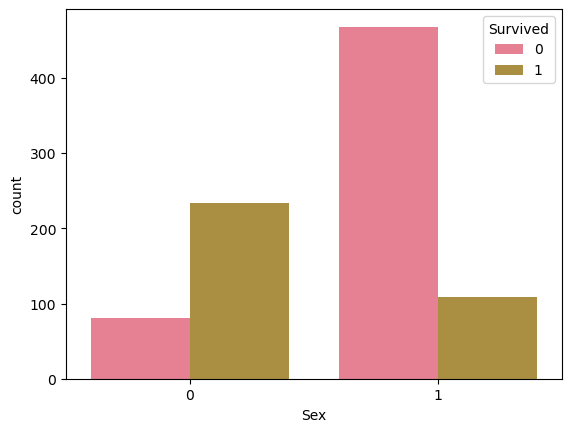

In [782]:
sns.countplot(x="Sex", hue="Survived", data=titanic_train)

As we can see there is a correlation between the sex and the surviveness. Female passengers are more likely to survive. This feature appears to be significant for the classification task.

Further, we can discretize the fare and age features since they have a large range of values.

In [783]:
titanic_train['Fare'] = pd.qcut(titanic_train['Fare'], 5)
print(titanic_train['Fare'].value_counts(sort=False)) 
titanic_train['Age'] = pd.cut(titanic_train['Age'], 6)
print(titanic_train['Age'].value_counts(sort=False))

(-0.001, 7.854]      179
(7.854, 10.5]        184
(10.5, 21.679]       172
(21.679, 39.688]     180
(39.688, 512.329]    176
Name: Fare, dtype: int64
(-0.08, 13.333]      71
(13.333, 26.667]    248
(26.667, 40.0]      424
(40.0, 53.333]       98
(53.333, 66.667]     43
(66.667, 80.0]        7
Name: Age, dtype: int64


<AxesSubplot:xlabel='Fare', ylabel='count'>

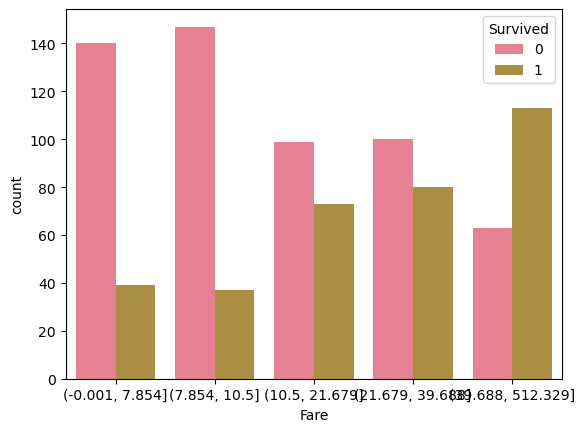

In [784]:
sns.countplot(x="Fare", hue="Survived", data=titanic_train)

<AxesSubplot:xlabel='Age', ylabel='count'>

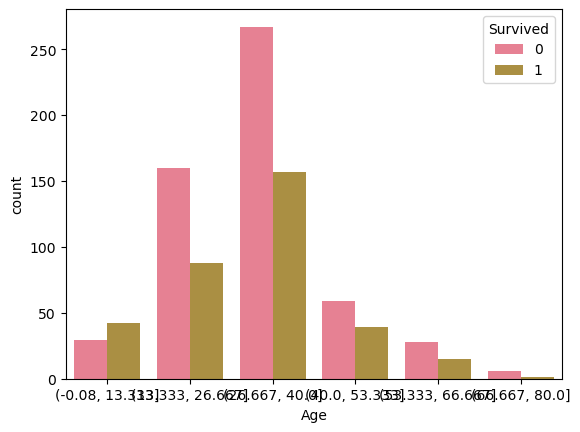

In [785]:
sns.countplot(x="Age", hue="Survived", data=titanic_train)

As we can see there is a small correlation between the age and the survival. Younger passengers are more likely to survive while adults passenger have minor changes. This feature can also be significant for the classification task even if the difference between data is not so high.

In [786]:
#Since we treat categorical values they need to be categorize and assign a integer number
#We can use the label encoder since we want to preserve the data order
titanic_train['Age']=le.fit_transform(titanic_train['Age'])
print("Categories of age: ",le.classes_)
print(titanic_train['Age'].head())

Categories of age:  [Interval(-0.08, 13.333, closed='right')
 Interval(13.333, 26.667, closed='right')
 Interval(26.667, 40.0, closed='right')
 Interval(40.0, 53.333, closed='right')
 Interval(53.333, 66.667, closed='right')
 Interval(66.667, 80.0, closed='right')]
0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int32


In [787]:
#We do the same for the fare attribute
titanic_train['Fare']=le.fit_transform(titanic_train['Fare'])
print("Categories of fare: ",le.classes_)
print(titanic_train['Fare'].head())

Categories of fare:  [Interval(-0.001, 7.854, closed='right')
 Interval(7.854, 10.5, closed='right')
 Interval(10.5, 21.679, closed='right')
 Interval(21.679, 39.688, closed='right')
 Interval(39.688, 512.329, closed='right')]
0    0
1    4
2    1
3    4
4    1
Name: Fare, dtype: int32


##### Understanding feature importance via correlation matrix 

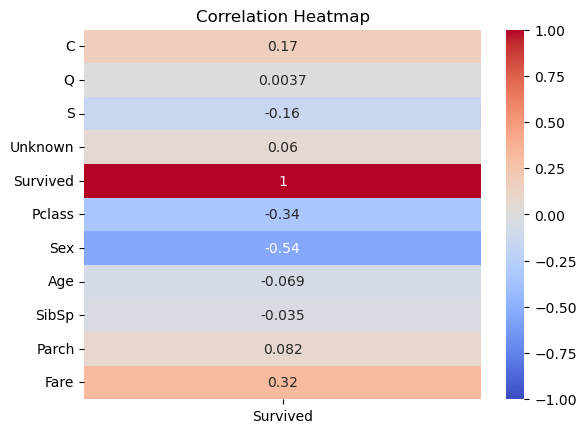

In [788]:
corr_matrix = titanic_train.corr()
sns.heatmap(corr_matrix[['Survived']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

On the whole, the correlation matrix give us an insight about the correlation between features. In particular, we are interested in the correlation between survive and the other features. First, we can see, as expected, that the sex attribute has more influence in determining the survival of passenger since there is a correlation of -0.54. Additionally, we can see that also the Pclass is correlated with survival of people. This means that also this attribute is potentially relevant for the classification purpose. Additionally, also the fare feature play a rule in determining the survival of people, since it has a correlation coefficient of 0.32. 
This means that we can leave the other features out of the predicting model since they do not impact on the discrimination process.

In [789]:
drop_columns=['Q','C','S','Unknown','SibSp','Parch']
titanic_train.drop(drop_columns,axis=1, inplace=True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 24.5 KB


### Defining the predicting model

In [790]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [791]:
X = titanic_train.iloc[:, 1:] 
y = titanic_train.iloc[:, 0] 

#### KNN Classifier

In [792]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Setting the K-fold parameter 
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


In [793]:
n_neighbors=[i for i in range(1,25)]

#Creating the classifier pipeline
pipeline=Pipeline([("knn",KNeighborsClassifier())])
labels=['No scaler']

#Setting the number of neighbors to be confronted
n_neighbors=[i for i in range(1,25)]

#Params grid for the GridSearchCV
p_grid = {"knn__n_neighbors": n_neighbors, "knn__metric": ['euclidean']} 

# initialize
grid_pipeline = GridSearchCV(pipeline,p_grid,cv=kf, scoring=('accuracy'))
# fit
grid_pipeline.fit(X_train,y_train) 
resultManhattan=pd.DataFrame({'pipeline':labels, 'knn_metric':'euclidean', 'knn_best_n_neighbors':grid_pipeline.best_params_['knn__n_neighbors'], 'best_score':grid_pipeline.best_score_})
resultManhattan

,pipeline,knn_metric,knn_best_n_neighbors,best_score
0,No scaler,euclidean,10,0.803319


In [794]:
clf_knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
clf_knn.fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)
# Performance
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred):.4f}") 

Accuracy: 0.7933


From the inspection, the KNN predicting algorithm with number of neighbors equal to 10 and euclidean distance metric the model gain an accuracy of 0.8. 

#### Decision Tree Classifier

Text(0.5, 1.0, 'Accuracy with Gini criterion')

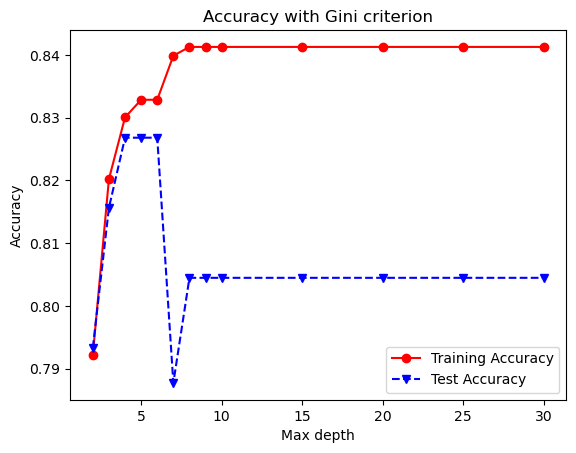

In [795]:
import numpy as np
#Reallocation of two zero lists to store accuracy measures on both train and test phases 
#Hyper-paramter list of max_depth values
hyperparam_list = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
train_acc = np.zeros(len(hyperparam_list))
test_acc = np.zeros(len(hyperparam_list)) 

#Constructing a decision tree model with limits values of depth and using the Gini criterion
for index, k in enumerate(hyperparam_list):
    clf = tree.DecisionTreeClassifier(max_depth=k, random_state=0, criterion='gini')
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    train_acc[index] = metrics.accuracy_score(y_train, y_predTrain)
    test_acc[index] = metrics.accuracy_score(y_test, y_predTest) 

plt.plot(hyperparam_list, train_acc,'ro-', hyperparam_list, test_acc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title(f"Accuracy with Gini criterion")

In [796]:
clf_dt_gini=tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=4)
clf_dt_gini.fit(X_train,y_train)
y_pred= clf_dt_gini.predict(X_test)  

# Performance
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred):.4f}") 

Accuracy: 0.8268


[Text(0.5089285714285714, 0.9, 'Sex <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.2857142857142857, 0.7, 'Pclass <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(0.14285714285714285, 0.5, 'Fare <= 2.5\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(0.07142857142857142, 0.3, 'Age <= 3.5\ngini = 0.231\nsamples = 30\nvalue = [4, 26]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.21428571428571427, 0.3, 'Age <= 0.5\ngini = 0.075\nsamples = 102\nvalue = [4, 98]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.25, 0.1, 'gini = 0.061\nsamples = 96\nvalue = [3, 93]'),
 Text(0.42857142857142855, 0.5, 'Fare <= 2.5\ngini = 0.499\nsamples = 115\nvalue = [55, 60]'),
 Text(0.35714285714285715, 0.3, 'Age <= 2.5\ngini = 0.479\nsamples = 88\nvalue = [35, 53]'),
 Text(0.32142857142857145, 0.1, 'gini = 0.

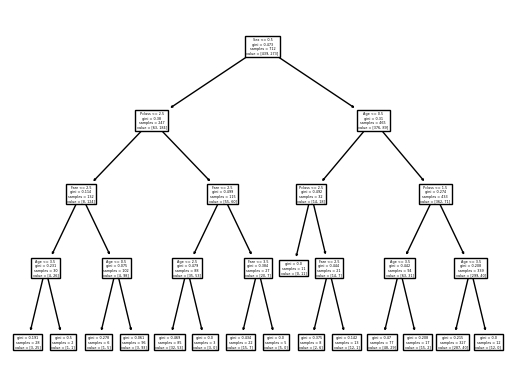

In [797]:
tree.plot_tree(clf_dt_gini, feature_names=X.columns)

#### SVC Classifier

In [798]:
#Params grid for the GridSearchCV
p_grid = {"svc__C": [1, 10, 100], "svc__kernel":['linear']}
pipeline=Pipeline([("svc",SVC())])

# initialize
grid_pipeline = GridSearchCV(pipeline,p_grid,cv=kf, scoring=('accuracy'), refit=True) 
# fit
grid_pipeline.fit(X_train,y_train)
result_svc_linear=pd.DataFrame({'pipeline':labels, 'kernel':'linear', 'best_params_C':grid_pipeline.best_params_['svc__C'], 'best_score':grid_pipeline.best_score_})
result_svc_linear

,pipeline,kernel,best_params_C,best_score
0,No scaler,linear,1,0.786497


In [799]:
clf_svc=SVC(random_state=0, kernel='linear', C=1)
clf_svc.fit(X_train,y_train)
y_pred= clf_svc.predict(X_test)  

# Performance
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred):.4f}") 

Accuracy: 0.7877


#### Logistic regression

In [800]:
clf_logreg=LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred= clf_logreg.predict(X_test)  

# Performance
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred):.4f}") 

Accuracy: 0.7821


On the whole, we can state that all classifier produce good results in term of accuracy. However, it seems that the best accuracy is gained with the decision tree with a depth of 4 (0.82). In the next section we will predict the survived feature for the test data. We apply each classifier to it since the accuracy is almost the same.

### Predicting test data

In [801]:
titanic_test = pd.read_csv('./data/titanic/test.csv')

In [802]:
#Drop insignificant features for titanic test
titanic_test.drop(['Name','Ticket','Cabin','SibSp','Parch','Embarked'],axis=1, inplace=True)
#Apply the data preprocessing on the test set
titanic_test['Age']=titanic_test['Age'].fillna(value=titanic_test['Age'].mean())
titanic_test['Age'] = titanic_test['Age'].astype(int)

titanic_test['Fare'] = pd.qcut(titanic_test['Fare'], 5)
titanic_test['Age'] = pd.cut(titanic_test['Age'], 6)
le=LabelEncoder()
titanic_test['Sex']=le.fit_transform(titanic_test['Sex'])
titanic_test['Fare']=le.fit_transform(titanic_test['Fare'])
titanic_test['Age']=le.fit_transform(titanic_test['Age'])
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int32
 4   Fare         418 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 11.6 KB


In [803]:
path_name=['titanic-submission_knn','titanic-submission_dt','titanic-submission_svc','titanic-submission_logreg']
for i,classifier in enumerate([clf_knn,clf_dt_gini, clf_svc, clf_logreg]): 
    data = {
    'PassengerId': titanic_test.iloc[:,0],
    'Survived': classifier.predict(titanic_test.iloc[:,1:])
    }

    df = pd.DataFrame(data)
    df.to_csv(path_or_buf=path_name[i]+'.csv', index=False)